In [1]:
#pip install nbconvert

In [2]:
#############################################################
####   CO2 emissions project - step(1) 
####               first data analysis 
#############################################################


#############################################################
####   Import libraries 
#############################################################

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#############################################################
####   Load CO2 File from my laptop
####   At this moment, only PT data for first analysys
####   later we can change this for a bigger file
#############################################################


df_Co2Pt = pd.read_csv("Co2_data_PT.csv")
display(df_Co2Pt.head())
df_Co2Pt.info()

C:\Users\mied1\AppData\Local\Temp\ipykernel_39188\4024746391.py:24: DtypeWarning: Columns (6,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Co2Pt = pd.read_csv("Co2_data_PT.csv")


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,136254,PT,IP-11-WF0-2017-0039,FORD-WERKE GMBH,FORD WERKE GMBH,FORD-WERKE GMBH,FORD-WERKE GMBH,e13*2007/46*1911*02,DEH,B7DA1PX,...,NaN,NaN,NaN,NaN,NaN,F,2019,NaN,NaN,NaN
1,1491418,PT,IP-04-U5Y-2018-0009,KIA,KIA SLOVAKIA,KIA MOTORS SLOVAKIA SRO,KIA MOTORS SLOVAKIA SRO,e4*2007/46*1299*01,CD,B5P11,...,NaN,NaN,NaN,NaN,NaN,F,2019,NaN,NaN,NaN
2,1491419,PT,IP-04-U5Y-2018-0009,KIA,KIA SLOVAKIA,KIA MOTORS SLOVAKIA SRO,KIA MOTORS SLOVAKIA SRO,e4*2007/46*1299*01,CD,B5P11,...,NaN,NaN,NaN,NaN,NaN,F,2019,NaN,NaN,NaN
3,1491420,PT,IP-04-U5Y-2018-0009,KIA,KIA SLOVAKIA,KIA MOTORS SLOVAKIA SRO,KIA MOTORS SLOVAKIA SRO,e4*2007/46*1299*01,CD,B5P11,...,NaN,NaN,NaN,NaN,NaN,F,2019,NaN,NaN,NaN
4,1491421,PT,IP-04-U5Y-2018-0009,KIA,KIA SLOVAKIA,KIA MOTORS SLOVAKIA SRO,KIA MOTORS SLOVAKIA SRO,e4*2007/46*1299*01,CD,B5P11,...,NaN,NaN,NaN,NaN,NaN,F,2019,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669929 entries, 0 to 669928
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    669929 non-null  int64  
 1   Country               669929 non-null  object 
 2   VFN                   661292 non-null  object 
 3   Mp                    639916 non-null  object 
 4   Mh                    669929 non-null  object 
 5   Man                   669929 non-null  object 
 6   MMS                   355301 non-null  object 
 7   Tan                   668031 non-null  object 
 8   T                     669929 non-null  object 
 9   Va                    668622 non-null  object 
 10  Ve                    668619 non-null  object 
 11  Mk                    669929 non-null  object 
 12  Cn                    669929 non-null  object 
 13  Ct                    669914 non-null  object 
 14  Cr                    669929 non-null  object 
 15  

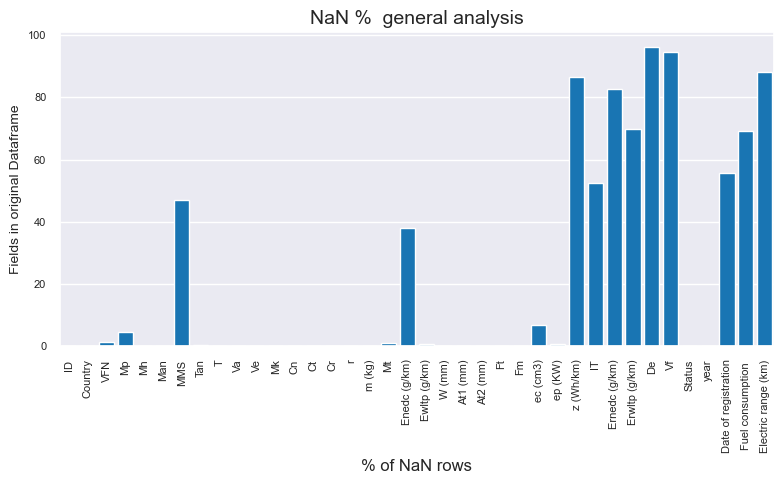

In [3]:
#############################################################
####   trying to identify columns with NA values
####   the idea is to delete columns without added value
####   same for unique values, colums having an unique value have not value.
#############################################################

####display ("nulls: ",df_Co2Pt.isnull().sum())
####display ("dups:",df_Co2Pt.nunique())

#############################################################
####   print a bar chart to see quickly this info.
####   i use an horizontal graph bar to make labels readble 
#############################################################

plt.figure(figsize=(8, 5))
sns.set(style='darkgrid', font="Arial")

tab = df_Co2Pt.isnull().sum() * 100 / len(df_Co2Pt)
sns.barplot(y=tab.values, x=tab.index, orient='vertical', color='#007acc')

plt.xlabel('% of NaN rows', fontsize=12)
plt.ylabel('Fields in original Dataframe', fontsize=10)
plt.title('NaN %  general analysis', fontsize=14)

plt.xticks(fontsize=8, rotation='vertical')
plt.yticks(fontsize=8)
plt.tight_layout()


In [4]:
#-----------------------------------------------    this is more or less same as before, @liva could you try to present uniques also as a graph or nulls instead of the list as below  

#############################################################
####   trying to identify columns with NA values
####   the idea is to delete columns without added value
####   same for unique values, colums having a unique value have not value.
####  adding some sub group view to see which ones are Fuel Type specific so that we do not exclude smaller categories 
#############################################################

# Calculate the total number of records in the DataFrame
# Calculate the number and percentage of nulls for each column


total_records = len(df_Co2Pt)
nulls = df_Co2Pt.isnull().sum()
percent_nulls = (df_Co2Pt.isnull().sum() / total_records) * 100

# Combine the nulls and their percentages into a single DataFrame for display
nulls_df = pd.DataFrame({'Nulls': nulls, 'Percentage of Total Nulls (%)': percent_nulls})

# Calculate the number of unique values for each column
uniques = df_Co2Pt.nunique()
percent_uniques = (df_Co2Pt.nunique() / total_records) * 100

# Combine the unique counts and their percentages into a single DataFrame for display
uniques_df = pd.DataFrame({'Uniques': uniques, 'Percentage of Total Uniques (%)': percent_uniques})

# Display the results
print("Nulls and their percentages:", nulls_df)
print("/")
print("Uniques and their percentages:", uniques_df)

Nulls and their percentages:                        Nulls  Percentage of Total Nulls (%)
ID                         0                       0.000000
Country                    0                       0.000000
VFN                     8637                       1.289241
Mp                     30013                       4.480027
Mh                         0                       0.000000
Man                        0                       0.000000
MMS                   314628                      46.964380
Tan                     1898                       0.283314
T                          0                       0.000000
Va                      1307                       0.195095
Ve                      1310                       0.195543
Mk                         0                       0.000000
Cn                         0                       0.000000
Ct                        15                       0.002239
Cr                         0                       0.000000
r          

In [5]:
#tidying up makes 'Mk' naming and low volume:

# Convert all names in 'Mk' to uppercase
df_Co2Pt['Mk'] = df_Co2Pt['Mk'].str.upper()

# Remove any extra spacing
df_Co2Pt['Mk'] = df_Co2Pt['Mk'].str.strip()

# Replace specific brand names
df_Co2Pt['Mk'] = df_Co2Pt['Mk'].replace(['MERCEDES AMG'], 'MERCEDES-AMG')
#df_Co2Pt['Mk'] = df_Co2Pt['Mk'].replace(['BMW I'], 'BMW')

# Count the frequency of each modality in 'Mk'
mk_counts = df_Co2Pt['Mk'].value_counts()

# Find modalities with frequency >= 50
mk_to_keep = mk_counts[mk_counts >= 50].index

# Keep rows where 'Mk' is in mk_to_keep
df_Co2Pt = df_Co2Pt[df_Co2Pt['Mk'].isin(mk_to_keep)]

#Check frequencies:
mk_modalities = df_Co2Pt['Mk'].value_counts()

# Display the modalities and their frequencies for 'Mk'

#print("Modalities and their frequencies for 'Mk':")
#print(mk_modalities)

In [6]:
#consolidate namings of Fuel type (FT)

# Sample modalities list
fuel_modalities = ['petrol', 'diesel', 'electric', 'ng', 'petrol/electric', 'diesel/electric', 'lpg', 'unknown', 
              'DIESEL/ELECTRIC', 'DIESEL', 'PETROL', 'ELECTRIC', 'PETROL/ELECTRIC', 'LPG', 'NG', 'HYDROGEN']

# Convert the modalities in 'Ft' column to lowercase to standardize
df_Co2Pt['Ft'] = df_Co2Pt['Ft'].str.lower()

# Mapping dictionary to consolidate naming
fuel_naming_consolidation = {
    'diesel/electric': 'hybrid diesel',
    'diesel': 'diesel',
    'petrol/electric': 'hybrid petrol',
    'petrol': 'petrol',
    'electric': 'electric',
    'lpg': 'lpg',
    'ng': 'natural gas',
    'unknown': 'unknown',
    'hydrogen': 'hydrogen'
}

# Apply the mapping to standardize naming
df_Co2Pt['Ft'] = df_Co2Pt['Ft'].map(fuel_naming_consolidation).fillna(df_Co2Pt['Ft'])


C:\Users\mied1\AppData\Local\Temp\ipykernel_39188\4258175385.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts_by_ft = df_Co2Pt.groupby('Ft').apply(lambda x: x.isnull().sum())
C:\Users\mied1\AppData\Local\Temp\ipykernel_39188\4258175385.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_counts_by_ft = df_Co2Pt.groupby('Ft').apply(lambda x: x.notnull().count())


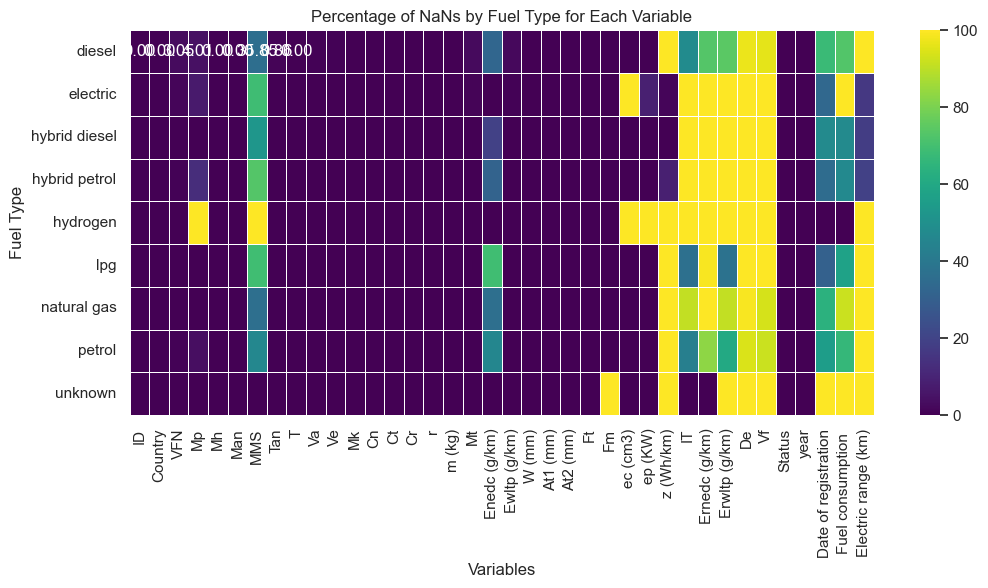

In [7]:
#-----------------------------------------------------------------------------------

#### LIVA comment - I am adding some extra visualisation to see which variables have high NaNs in all Fuel types 
# Assuming df_Ptred[ is your DataFrame and 'Ft' is the fuel type column
# Calculate NaN counts for each column, grouped by 'Ft'

nan_counts_by_ft = df_Co2Pt.groupby('Ft').apply(lambda x: x.isnull().sum())

# Calculate total counts for each 'Ft' to find percentages
total_counts_by_ft = df_Co2Pt.groupby('Ft').apply(lambda x: x.notnull().count())

# Calculate NaN percentages
nan_percentages_by_ft = (nan_counts_by_ft / total_counts_by_ft) * 100

# Plotting the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(nan_percentages_by_ft, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Percentage of NaNs by Fuel Type for Each Variable')
plt.xlabel('Variables')
plt.ylabel('Fuel Type')
plt.show()



In [8]:
####BASED ON ABOVE CREATING A LIST WITH Variables with more than 60% NaNs across all fuel types

# Identifying variables where more than 60% of values are NaNs across all fuel types
high_nan_variables = nan_percentages_by_ft.columns[(nan_percentages_by_ft > 60).all()]

# Convert the result to a list
high_nan_variables_list = list(high_nan_variables)

# Print the list of variables
print("Variables with more than 60% NaNs across all fuel types:", high_nan_variables_list)

Variables with more than 60% NaNs across all fuel types: ['De', 'Vf']


In [9]:
#############################################################
# modalities of MH and MK - Keeping MK for now  
# Count the occurrences of each unique value in the 'Mh' column
# Count the occurrences of each unique value in the 'Brand' column
# Display the modalities and their frequencies for 'Mh'
#############################################################

mh_modalities = df_Co2Pt['Mh'].value_counts()
mp_modalities = df_Co2Pt['Mp'].value_counts()
mk_modalities = df_Co2Pt['Mk'].value_counts()

print("Modalities and their frequencies for 'Mh':")
print(mh_modalities)
print("\n")  # Adds an empty line for better readability
print("Modalities and their frequencies for 'Mp':")
print(mp_modalities)
print("\n")  # Adds an empty line for better readability

Modalities and their frequencies for 'Mh':
Mh
RENAULT                83375
BMW AG                 53525
MERCEDES-BENZ AG       37978
AUTOMOBILES PEUGEOT    36161
PSA                    36026
                       ...  
CNG TECHNIK               24
ALPINE                    20
MARUTI SUZUKI             15
HONDA UK                  12
AUDI HUNGARIA              8
Name: count, Length: 62, dtype: int64


Modalities and their frequencies for 'Mp':
Mp
RENAULT-NISSAN-MITSUBISHI        89983
STELLANTIS                       78570
PSA-OPEL                         77413
VW-SAIC                          38505
MERCEDES-BENZ                    38082
BMW                              37503
RENAULT                          35471
VW GROUP PC                      27384
VOLKSWAGEN                       22400
TOYOTA-MAZDA                     20763
DAIMLER AG                       20471
KIA                              20215
FCA-TESLA                        19160
HYUNDAI                          18855
MAZ

In [10]:



#############################################################
# Count the frequency of each modality in 'Brand'
# Find modalities with frequency >= 50
# Keep rows where 'Brand' is in mk_to_keep
# Display the modalities and their frequencies for 'Brand'
#############################################################

mk_counts = df_Co2Pt['Mk'].value_counts()
mk_to_keep = mk_counts[mk_counts >= 50].index
df_Co2Pt = df_Co2Pt[df_Co2Pt['Mk'].isin(mk_to_keep)]

#Check frequencies:
mk_modalities = df_Co2Pt['Mk'].value_counts()
print("Modalities and their frequencies for 'Brand':")
print(mk_modalities)

Modalities and their frequencies for 'Brand':
Mk
RENAULT                         75435
PEUGEOT                         73834
MERCEDES-BENZ                   52925
BMW                             44812
CITROEN                         39712
FIAT                            33182
VOLKSWAGEN                      32945
TOYOTA                          32598
SEAT                            30775
NISSAN                          28841
DACIA                           27118
OPEL                            26343
HYUNDAI                         26118
FORD                            25941
KIA                             20240
VOLVO                           16948
AUDI                            13913
MINI                             8197
TESLA                            7637
SKODA                            6595
MAZDA                            6170
MITSUBISHI                       6005
SMART                            5301
JEEP                             4355
HONDA                            3802
P

In [11]:
#############################################################
# Compare the values in 'Ct' and 'Cr' to identify rows where the values are not the same
# Calculate the number of rows where 'Ct' and 'Cr' are not the same
# Calculate the total number of rows in the DataFrame
# Calculate the percentage of rows where 'Ct' and 'Cr' values are not the same
#############################################################

different_values_mask = df_Co2Pt['Ct'] != df_Co2Pt['Cr']
different_values_count = different_values_mask.sum()
total_rows = len(df_Co2Pt)
percentage_different = (different_values_count / total_rows) * 100

# Print the result
print(f"Percentage of values in 'Ct' and 'Cr' that are not the same: {percentage_different:.2f}%")

#############################################################
### Modalities of r
# Count the occurrences of each unique value in the 'r' column
# Display the modalities and their frequencies for 'r'
#############################################################

r_modalities = df_Co2Pt['r'].value_counts()
print("Modalities and their frequencies for 'r':")
print(r_modalities)
print("\n")  # Adds an empty line for better readability

#############################################################
#Checking if we can remove registration date
# Ensure 'Date of registration' is in datetime format (if not already)
# Extract year from 'Date of registration'
# Filter rows where 'Date of registration' is not NaN
# Compare 'year' with extracted year from 'Date of registration' and calculate matches
# Calculate percentage of matches
#############################################################

df_Co2Pt['Date of registration'] = pd.to_datetime(df_Co2Pt['Date of registration'], errors='coerce')
df_Co2Pt['registration_year'] = df_Co2Pt['Date of registration'].dt.year
df_non_null_registration = df_Co2Pt.dropna(subset=['Date of registration'])

matches = (df_non_null_registration['year'] == df_non_null_registration['registration_year'])
percentage_matches = (matches.sum() / len(df_non_null_registration)) * 100

print(f"Percentage of entries where 'year' matches the year from 'Date of registration': {percentage_matches:.2f}%")


Percentage of values in 'Ct' and 'Cr' that are not the same: 0.03%
Modalities and their frequencies for 'r':
r
1    669892
Name: count, dtype: int64


Percentage of entries where 'year' matches the year from 'Date of registration': 100.00%


In [12]:
#############################################################
### Checking data of 3 IT, Ernedc (g/km), Erwltp (g/km) as they are seemingly linked
# Create boolean masks indicating non-NaN entries for each specified column
# Calculate the total number of non-NaN entries for each column
# Calculate the number (and then percentage) of non-NaN entries in each column that have corresponding non-NaN entries in the other columns
#############################################################
non_nan_it = df_Co2Pt['IT'].notna()
non_nan_ernedc = df_Co2Pt['Ernedc (g/km)'].notna()
non_nan_erwltp = df_Co2Pt['Erwltp (g/km)'].notna()

total_non_nan_it = non_nan_it.sum()
total_non_nan_ernedc = non_nan_ernedc.sum()
total_non_nan_erwltp = non_nan_erwltp.sum()

cross_non_nan = pd.DataFrame({
    'IT': [
        100 * (non_nan_it & non_nan_ernedc & non_nan_erwltp).sum() / total_non_nan_it,
        100 * (non_nan_it & non_nan_ernedc).sum() / total_non_nan_it,
        100 * (non_nan_it & non_nan_erwltp).sum() / total_non_nan_it
    ],
    'Ernedc (g/km)': [
        100 * (non_nan_it & non_nan_ernedc & non_nan_erwltp).sum() / total_non_nan_ernedc,
        100 * (non_nan_ernedc & non_nan_erwltp).sum() / total_non_nan_ernedc,
        100 * (non_nan_ernedc & non_nan_it).sum() / total_non_nan_ernedc
    ],
    'Erwltp (g/km)': [
        100 * (non_nan_it & non_nan_ernedc & non_nan_erwltp).sum() / total_non_nan_erwltp,
        100 * (non_nan_erwltp & non_nan_ernedc).sum() / total_non_nan_erwltp,
        100 * (non_nan_erwltp & non_nan_it).sum() / total_non_nan_erwltp
    ]
}, index=['All Three', 'IT & Ernedc', 'IT & Erwltp'])

# Display the cross-tabulation
print(cross_non_nan)

                    IT  Ernedc (g/km)  Erwltp (g/km)
All Three     0.788523       2.176981       1.242126
IT & Ernedc  36.220924       2.176981       1.242126
IT & Erwltp  63.481733     100.000000     100.000000


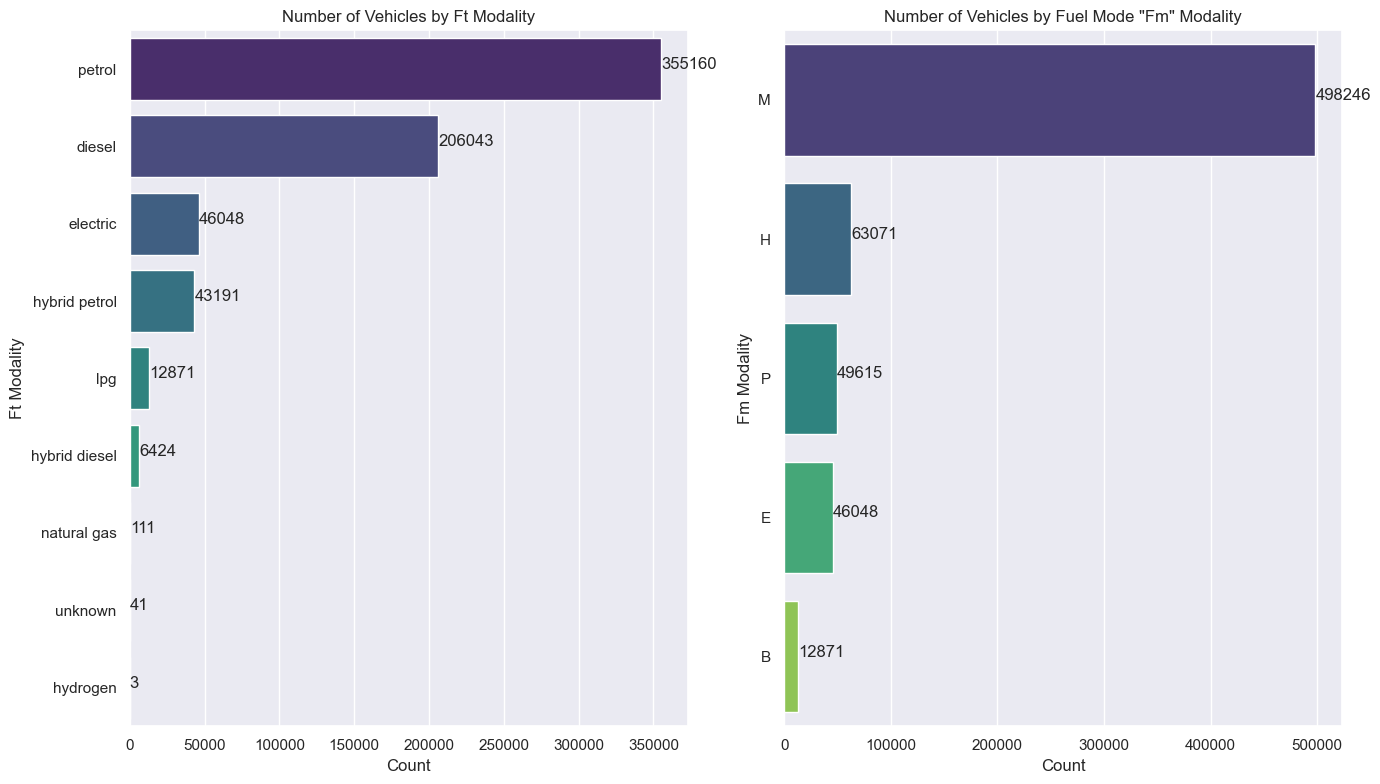

In [13]:
#############################################################
## IDENTIFYING FURTHER CLEANUP NEEDS - fuels do not have consistent naming so cleaning this up in the next step
# The fuel mode seems to be useful as a bigger category, so keep that 
# Deeper dive to see Ft Fuel type and Fm Fuel mode in more detail
# Calculate the count of unique values for 'Ft' and 'Fm'
#############################################################

import seaborn as sns

# Calculate the count of unique values for 'Ft'
ft_counts = df_Co2Pt['Ft'].value_counts().reset_index()
ft_counts.columns = ['Ft Modality', 'Count']

# Calculate the count of unique values for 'Fm'
fm_counts = df_Co2Pt['Fm'].value_counts().reset_index()
fm_counts.columns = ['Fm Modality', 'Count']

# Create a figure with two subplots (side by side) for 'Ft' and 'Fm'
plt.figure(figsize=(14, 8))

# Plot for 'Ft'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='Count', y='Ft Modality', data=ft_counts, palette='viridis')
plt.title('Number of Vehicles by Ft Modality')
plt.xlabel('Count')
plt.ylabel('Ft Modality')
# Adding data labels
for index, value in enumerate(ft_counts['Count']):
    plt.text(value, index, str(value))

# Plot for 'Fm'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='Count', y='Fm Modality', data=fm_counts, palette='viridis')
plt.title('Number of Vehicles by Fuel Mode "Fm" Modality')
plt.xlabel('Count')
plt.ylabel('Fm Modality')
# Adding data labels
for index, value in enumerate(fm_counts['Count']):
    plt.text(value, index, str(value))

# Adjust layout to make room for the titles and prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

##looks like we can remove NG and hydrogen and tidy up the naming of variables

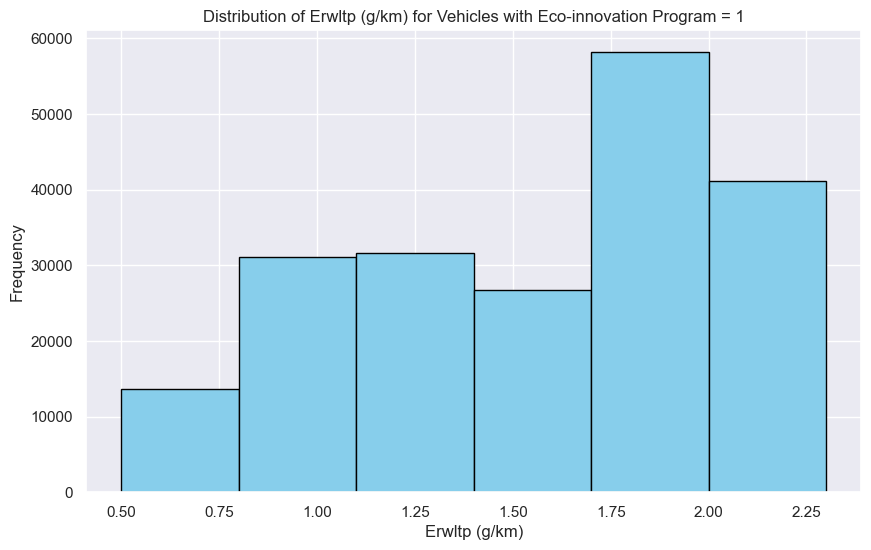

In [14]:
#############################################################
#Still having doubts with regards Erwltp (g/km) but my analysis show that data is linked to Eco-innovation program presence so i will keep IT
#############################################################
 
    
# Filter the DataFrame for rows where 'Eco-innovation program' is 1
eco_innovative_vehicles = df_Co2Pt[df_Co2Pt['IT'].notna().astype(int) == 1]

# Define the range of interest for 'Erwltp (g/km)'
min_value = 0.5
max_value = 2.3

# Filter the data to include only the values within the specified range
filtered_data = eco_innovative_vehicles[(eco_innovative_vehicles['Erwltp (g/km)'] >= min_value) & (eco_innovative_vehicles['Erwltp (g/km)'] <= max_value)]

# Plotting the histogram for 'Erwltp (g/km)' within the range and for 'Eco-innovation program' = 1
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Erwltp (g/km)'].dropna(), bins=6, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Erwltp (g/km) for Vehicles with Eco-innovation Program = 1')
plt.xlabel('Erwltp (g/km)')
plt.ylabel('Frequency')

# Showing the plot
plt.show()



###                    ##########################################################
#####                              End columns analysys  
###                    ##########################################################

In [15]:
###                    ##########################################################
#####                             --  Data Manipulation  ----
###                    ##########################################################

#############################################################
#####   in order to keep original data, and work with
#####     a relevant dataset, i copy my dataset 
#############################################################

df_Ptred = df_Co2Pt.copy()

#############################################################
#tidying up makes 'Brand' naming and low volume:
#   Convert all names in 'Brand' to uppercase
#   Remove any extra spacing
#   Replace specific brand names
#############################################################


df_Ptred['Mk'] = df_Ptred['Mk'].str.upper()
df_Ptred['Mk'] = df_Ptred['Mk'].str.strip()
df_Ptred['Mk'] = df_Ptred['Mk'].replace(['MERCEDES AMG'], 'MERCEDES-AMG')
#df_Ptred['Mk'] = df_Ptred['Mk'].replace(['BMW I'], 'BMW')


##########################################################
#consolidate namings of Fuel type (FT)
##########################################################
    
# Sample modalities list
fuel_modalities = ['petrol', 'diesel', 'electric', 'ng', 'petrol/electric', 'diesel/electric', 'lpg', 'unknown', 
              'DIESEL/ELECTRIC', 'DIESEL', 'PETROL', 'ELECTRIC', 'PETROL/ELECTRIC', 'LPG', 'NG', 'HYDROGEN']

# Convert the modalities in 'Ft' column to lowercase to standardize
df_Ptred['Ft'] = df_Ptred['Ft'].str.lower()

# Mapping dictionary to consolidate naming
fuel_naming_consolidation = {
'diesel/electric': 'hybrid diesel',
'diesel': 'diesel',
'petrol/electric': 'hybrid petrol',
'petrol': 'petrol',
'electric': 'electric',
'lpg': 'lpg',
'ng': 'natural gas',
'unknown': 'unknown',
'hydrogen': 'hydrogen'
}

# Apply the mapping to standardize naming
df_Ptred['Ft'] = df_Ptred['Ft'].map(fuel_naming_consolidation).fillna(df_Ptred['Ft'])


################################################
####
#### Removing rows with rare fuel types (less than 500 records)
####
################################################

# Count the number of entries for each 'Ft' value
ft_counts = df_Ptred['Ft'].value_counts()

# Find the 'Ft' values with at least 500 entries
ft_to_keep = ft_counts[ft_counts >= 500].index

# Filter the DataFrame to only include rows with those 'Ft' values
df_Ptred = df_Ptred[df_Ptred['Ft'].isin(ft_to_keep)]


# To verify the consolidation, let's print the unique modalities after the operation
unique_modalities_after = df_Ptred['Ft'].unique()
print(unique_modalities_after)

['petrol' 'diesel' 'electric' 'hybrid petrol' 'hybrid diesel' 'lpg']


In [16]:
##Column IT (Innovative technology or group of innovative technologies to reduce emissions
##the code is a combination that encodes the country of regulation type of innovation etc, however we lack info on details.
## As a result I will replace it with TRUE if the vehicle has a record of the innovation program or FALSE if not 
## I have renamed the column 'Eco-innovation program' 

# Create the 'Eco-innovation program' column based on 'IT' column's NaN status
df_Ptred['Eco-innovation program'] = df_Ptred['IT'].notna().astype(int)

# Remove the 'IT' column
df_Ptred.drop(columns='IT', inplace=True)

df_Ptred.head()
df_Ptred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669737 entries, 0 to 669928
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID                      669737 non-null  int64         
 1   Country                 669737 non-null  object        
 2   VFN                     661109 non-null  object        
 3   Mp                      639751 non-null  object        
 4   Mh                      669737 non-null  object        
 5   Man                     669737 non-null  object        
 6   MMS                     355172 non-null  object        
 7   Tan                     667841 non-null  object        
 8   T                       669737 non-null  object        
 9   Va                      668431 non-null  object        
 10  Ve                      668428 non-null  object        
 11  Mk                      669737 non-null  object        
 12  Cn                      669737 non-

In [17]:
#############################################################
#### There are 5 columns showing manufacturer info so I am removing this already in this stage - Keeping Mk and Mp based on our conversation
#### also removing Ct (Category approved) since there's 99% overlap between Cr
#### Creating a new df in df_Ptred
#### Removing variant as it refers to cosmetic attributes of the car
#### Removing TAN as to my understanding it refers more to regulation ID and does not give info on car attributes
#### removing r or total new registrations since it is 1 for all
#### Removing 'Date of registration' since the year value is the same as year, and it has a lot of NaNs


##Column IT (Innovative technology or group of innovative technologies to reduce emissions
##the code is a combination that encodes the country of regulation type of innovation etc, however we lack info on details.
## As a result I will replace it with TRUE if the vehicle has a record of the innovation program or FALSE if not 
## I have renamed the column 'Eco-innovation program' 
#############################################################

# List of columns to remove
columns_to_remove = ['Man', 'MMS','Mh','Ct','Status','VFN','Va','Tan','r','Date of registration','registration_year','Ernedc (g/km)', 'De', 'Vf']


# Remove the specified columns from the DataFrame
df_Ptred = df_Ptred.drop(columns=columns_to_remove, axis=1)

# Display the DataFrame to verify the columns have been removed
#df info

display(df_Ptred.head())
df_Ptred.info()

,ID,Country,Mp,T,Ve,Mk,Cn,Cr,m (kg),Mt,...,Ft,Fm,ec (cm3),ep (KW),z (Wh/km),Erwltp (g/km),year,Fuel consumption,Electric range (km),Eco-innovation program
0,136254,PT,FORD-WERKE GMBH,DEH,5APBZ6AB7BT,FORD,Focus,M1,1383,1501.0,...,petrol,M,999.0,92.0,NaN,NaN,2019,NaN,NaN,0
1,1491418,PT,KIA,CD,M61A11,KIA,CEED,M1,1297,1444.0,...,petrol,M,998.0,88.0,NaN,NaN,2019,NaN,NaN,0
2,1491419,PT,KIA,CD,M61A11,KIA,CEED,M1,1297,1444.0,...,petrol,M,998.0,88.0,NaN,NaN,2019,NaN,NaN,0
3,1491420,PT,KIA,CD,M61A11,KIA,CEED,M1,1297,1414.0,...,petrol,M,998.0,88.0,NaN,NaN,2019,NaN,NaN,0
4,1491421,PT,KIA,CD,M61A11,KIA,CEED,M1,1297,1445.0,...,petrol,M,998.0,88.0,NaN,NaN,2019,NaN,NaN,0


<class 'pandas.core.frame.DataFrame'>
Index: 669737 entries, 0 to 669928
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      669737 non-null  int64  
 1   Country                 669737 non-null  object 
 2   Mp                      639751 non-null  object 
 3   T                       669737 non-null  object 
 4   Ve                      668428 non-null  object 
 5   Mk                      669737 non-null  object 
 6   Cn                      669737 non-null  object 
 7   Cr                      669737 non-null  object 
 8   m (kg)                  669737 non-null  int64  
 9   Mt                      662784 non-null  float64
 10  Enedc (g/km)            415937 non-null  float64
 11  Ewltp (g/km)            664555 non-null  float64
 12  W (mm)                  669610 non-null  float64
 13  At1 (mm)                669591 non-null  float64
 14  At2 (mm)                6

In [18]:
#############################################################
#####   i delete columns having > 60% of NA values
#####  may be later i decide someone is needed, in that case
#####   i can retrieve it thank to the original dataset
#############################################################

#topNA = len(df)*0.6
#df = df_Ptred.dropna(thresh=topNA, axis=1)

#############################################################
#####  i have some doubts about Ft (Energy) and fuel mode,
#####    i make an analysis and i decide to unify 
#####      Enegy descriptions as capital letter
#####  i decide to keep enery and fuel mode as not clear for me the difference
#####     then i rename also this column 
#############################################################

####display(pd.crosstab(df_Ptred.Ft, df_Ptred.Fm))
####df_Ptred.Ft = df_Ptred.Ft.str.upper()

display(pd.crosstab(df_Ptred['Ft'], df_Ptred['Fm']))

Fm,B,E,H,M,P
Ft,,,,,
diesel,0,0,10602,195441,0
electric,0,46048,0,0,0
hybrid diesel,0,0,0,0,6424
hybrid petrol,0,0,0,0,43191
lpg,12871,0,0,0,0
petrol,0,0,52469,302691,0


In [19]:
#############################################################
# Replace NaN values in 'Erwltp (g/km)' with 0 since it is 0 in case if the vehicle did not  prarticipate in eco-innovation program
#df_Ptred['Erwltp (g/km)'] = df_Ptred['Erwltp (g/km)'].fillna(0)
#To verify the replacement, you might want to display the first few rows
# print(df_Ptred.head())


In [20]:
#############################################################
#####  Rename most relevant columns to make
#####    this project easier to write and understand
#############################################################


df_Ptred.rename(columns={"Ewltp (g/km)":"CO2_wltp"}, inplace = True)
df_Ptred.rename(columns={"Mk":"Brand"}, inplace = True)
df_Ptred.rename(columns={"Mp":"Constructor"}, inplace = True)
df_Ptred.rename(columns={"Mt":"Test_mass"}, inplace = True)
df_Ptred.rename(columns={"Cn":"Veh_Model"}, inplace = True)
df_Ptred.rename(columns={"Cr":"Veh_Category"}, inplace = True)
df_Ptred.rename(columns={"Ft":"Energy"}, inplace = True)
df_Ptred.rename(columns={"m (kg)":"Kg_veh"}, inplace = True)
df_Ptred.rename(columns={"ec (cm3)":"Engine_cm3"}, inplace = True)
df_Ptred.rename(columns={"ep (KW)":"Power_KW"}, inplace = True)
df_Ptred.rename(columns={"z (Wh/km)": "El_Consumpt_whkm"}, inplace = True)
df_Ptred.rename(columns={"Fm":"Fuel_mode"}, inplace = True)
df_Ptred.rename(columns={"T":"Veh_type"}, inplace = True)
df_Ptred.rename(columns={"Ve":"Version"}, inplace = True)
df_Ptred.rename(columns={"W (mm)":"Wheelbase_mm"}, inplace = True)
df_Ptred.rename(columns={"At1 (mm)":"Axle_width_steer_mm"}, inplace = True)
df_Ptred.rename(columns={"At2 (mm)":"Axle_width_other_mm"}, inplace = True)
df_Ptred.rename(columns={"Fuel consumption ":"Fuel consumption"}, inplace = True)

df_Ptred["CO2"] = df_Ptred["CO2_wltp"]                              #-------------------------------------------------------------------
df_Ptred["Elect_Consumption"] = df_Ptred["El_Consumpt_whkm"]        #-------------------------------------------------------------------

df_Ptred.head()
df_Ptred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669737 entries, 0 to 669928
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      669737 non-null  int64  
 1   Country                 669737 non-null  object 
 2   Constructor             639751 non-null  object 
 3   Veh_type                669737 non-null  object 
 4   Version                 668428 non-null  object 
 5   Brand                   669737 non-null  object 
 6   Veh_Model               669737 non-null  object 
 7   Veh_Category            669737 non-null  object 
 8   Kg_veh                  669737 non-null  int64  
 9   Test_mass               662784 non-null  float64
 10  Enedc (g/km)            415937 non-null  float64
 11  CO2_wltp                664555 non-null  float64
 12  Wheelbase_mm            669610 non-null  float64
 13  Axle_width_steer_mm     669591 non-null  float64
 14  Axle_width_other_mm     6

In [21]:
df_Ptred.describe()

,ID,Kg_veh,Test_mass,Enedc (g/km),CO2_wltp,Wheelbase_mm,Axle_width_steer_mm,Axle_width_other_mm,Engine_cm3,Power_KW,El_Consumpt_whkm,Erwltp (g/km),year,Fuel consumption,Electric range (km),Eco-innovation program,CO2,Elect_Consumption
count,6.697370e+05,669737.000000,662784.000000,415937.000000,664555.000000,669610.000000,669591.000000,669535.000000,623688.000000,665668.000000,91112.000000,202385.000000,669737.000000,205682.000000,78808.000000,669737.000000,664555.000000,91112.000000
mean,3.161493e+07,1404.145936,1525.588078,94.155701,116.669082,2644.476785,1545.905490,1543.380504,1387.824892,94.515709,176.809048,1.540357,2020.351344,4.956007,225.179119,0.475967,116.669082,176.809048
std,3.306652e+07,302.001585,311.072024,42.072704,44.115236,156.664268,53.277805,58.209766,405.945919,49.457486,35.503631,0.459957,1.165900,1.590366,186.544894,0.499422,44.115236,35.503631
min,1.362540e+05,885.000000,984.000000,0.000000,0.000000,1873.000000,1310.000000,1270.000000,875.000000,33.000000,14.000000,0.500000,2019.000000,0.500000,13.000000,0.000000,0.000000,14.000000
25%,1.564146e+06,1171.000000,1297.000000,93.000000,117.000000,2560.000000,1512.000000,1506.000000,999.000000,70.000000,156.000000,1.140000,2019.000000,4.600000,56.000000,0.000000,117.000000,156.000000
50%,5.769825e+06,1354.000000,1472.000000,107.000000,127.000000,2638.000000,1550.000000,1549.000000,1332.000000,85.000000,166.000000,1.660000,2020.000000,5.300000,110.000000,0.000000,127.000000,166.000000
75%,5.310632e+07,1530.000000,1660.000000,117.000000,137.000000,2702.000000,1577.000000,1577.000000,1499.000000,100.000000,189.000000,1.920000,2021.000000,5.700000,396.000000,1.000000,137.000000,189.000000
max,1.496947e+08,2855.000000,3062.000000,464.000000,499.000000,4332.000000,1810.000000,1980.000000,6752.000000,932.000000,394.000000,2.300000,2022.000000,16.400000,747.000000,1.000000,499.000000,394.000000


C:\Users\mied1\AppData\Local\Temp\ipykernel_39188\1310666765.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts_by_Energy = df_Ptred.groupby('Energy').apply(lambda x: x.isnull().sum())
C:\Users\mied1\AppData\Local\Temp\ipykernel_39188\1310666765.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_counts_by_Energy = df_Ptred.groupby('Energy').apply(lambda x: x.notnull().count())


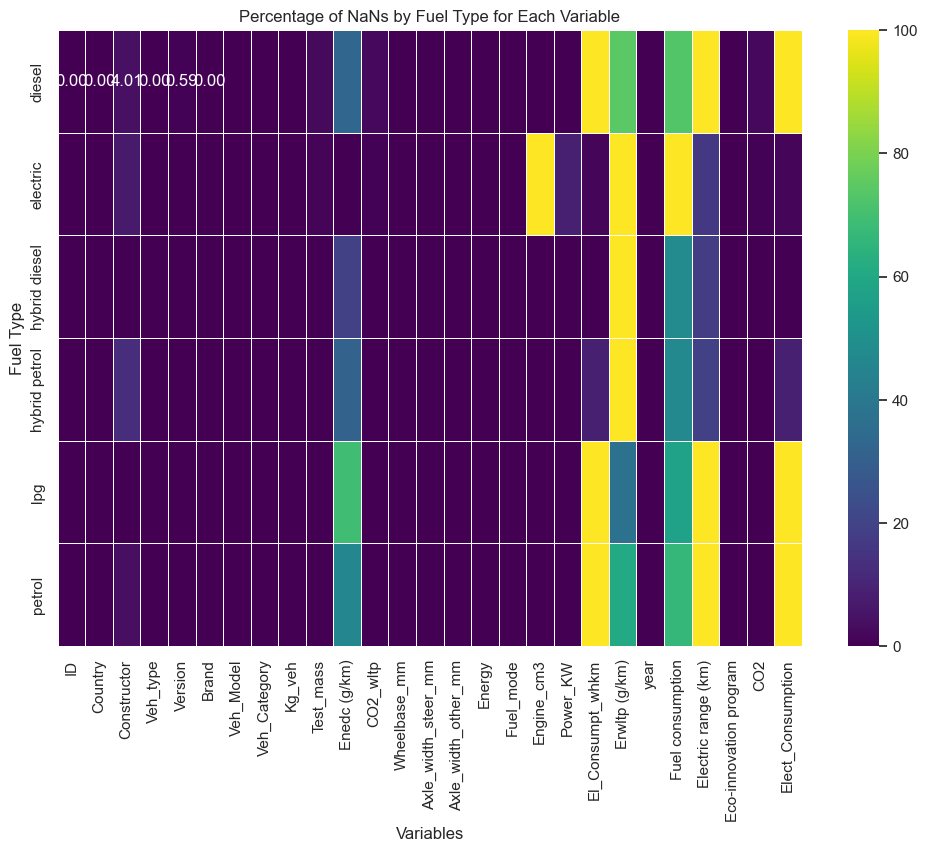

In [22]:
#############################################################
#### Cross-checking NaN distribution  after cleanup
#############################################################

# Assuming df_Ptred is your DataFrame and 'Ft' is the fuel type column
# Calculate NaN counts for each column, grouped by 'Ft'
nan_counts_by_Energy = df_Ptred.groupby('Energy').apply(lambda x: x.isnull().sum())

# Calculate total counts for each 'Ft' to find percentages
total_counts_by_Energy = df_Ptred.groupby('Energy').apply(lambda x: x.notnull().count())

# Calculate NaN percentages
nan_percentages_by_Energy = (nan_counts_by_Energy / total_counts_by_Energy) * 100

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(nan_percentages_by_Energy, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Percentage of NaNs by Fuel Type for Each Variable')
plt.xlabel('Variables')
plt.ylabel('Fuel Type')
plt.show()

In [23]:
#############################################################
## Checking again NaN %
# Calculate the number and percentage of nulls for each column
# Combine the nulls and their percentages into a single DataFrame for display
#############################################################

total_records = len(df_Ptred)
nans = df_Ptred.isna().sum()
percent_nans = (df_Ptred.isna().sum() / total_records) * 100
nans_df = pd.DataFrame({'Nans': nans, 'Percentage of Total Nans (%)': percent_nans})

# Display the results
display("Nulls and their percentages:", nans_df)

'Nulls and their percentages:'

,Nans,Percentage of Total Nans (%)
ID,0,0.000000
Country,0,0.000000
Constructor,29986,4.477280
Veh_type,0,0.000000
Version,1309,0.195450
Brand,0,0.000000
Veh_Model,0,0.000000
Veh_Category,0,0.000000
Kg_veh,0,0.000000
Test_mass,6953,1.038169


In [24]:
#CREATING NEW COLUMN COMBINING WLTP AND NDEC CO2 MEASUREMENTS AND A COLUMN TO LABEL WHICH PROGRAM IT IS

# Create a new column 'CO2_combined' that takes values from 'CO2_wltp' and fills NaNs with 'Enedc (g/km)'
df_Ptred['CO2_combined'] = df_Ptred['CO2_wltp'].fillna(df_Ptred['Enedc (g/km)'])

# Create a new column 'WLTP_1_NEDC_0' to indicate the source of 'CO2_combined' values
df_Ptred['WLTP_1_NEDC_0'] = df_Ptred['CO2_wltp'].notna().astype(int)

# Display the first few rows to verify
display(df_Ptred[['CO2_wltp', 'Enedc (g/km)', 'CO2_combined', 'WLTP_1_NEDC_0']].head(7))

,CO2_wltp,Enedc (g/km),CO2_combined,WLTP_1_NEDC_0
0,130.0,108.0,130.0,1
1,135.0,127.0,135.0,1
2,135.0,127.0,135.0,1
3,133.0,127.0,133.0,1
4,135.0,127.0,135.0,1
5,136.0,127.0,136.0,1
6,NaN,104.0,104.0,0


In [25]:

####   To see complementary info please uncomment and RUN next files. 

# %run "000b - Starting Point -Complements.ipynb"   
# %run "000b - Starting Point -Complements.ipynb"
